**Optimización / Proyecto 2-Parte II (core)**

## **Proyecto 2-Parte II (core)**

**Proyecto 2:** Análisis y Selección de Problema 

**Parte II:** Preprocesamiento y Optimización

**Objetivo:** 
* Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

**Instrucciones Detalladas**

**Parte 1:** Preprocesamiento de Datos

**Limpieza de Datos:**
* Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
* Manejar los outliers mediante técnicas de filtrado o transformación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('../../data/retail_sales_dataset.csv')

# Exploración de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [4]:
pd.options.display.max_columns = 999

In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
# Ver los últimos registros
print(df.tail())

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [7]:
# Recuento de valores nulos por columna
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


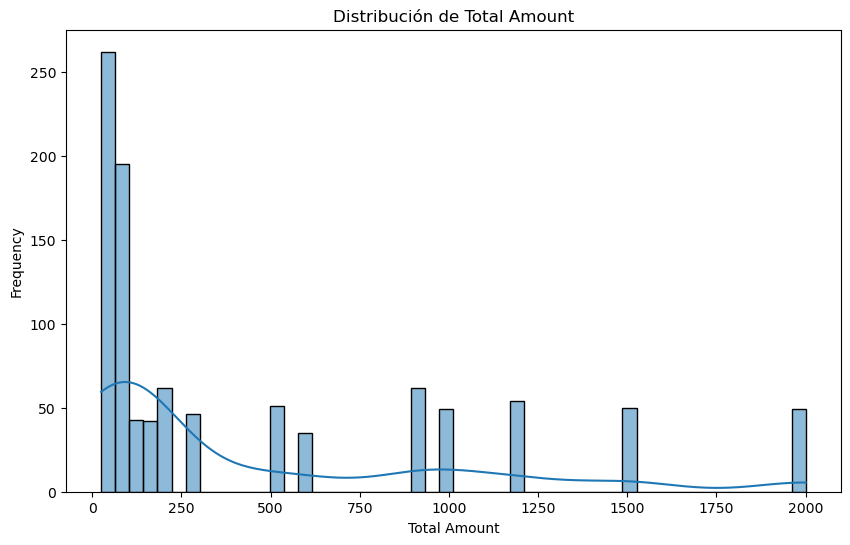

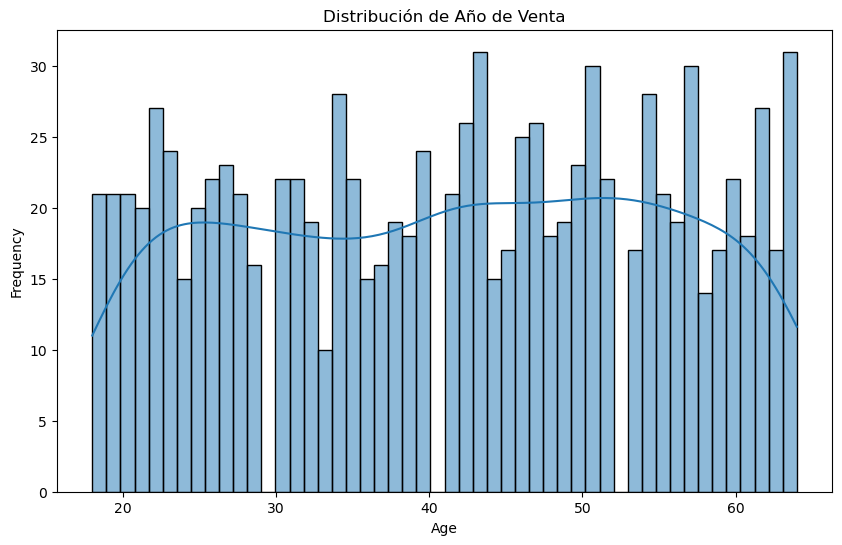

In [8]:
# Histograma de la columna de precio
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=50, kde=True)
plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Histograma del año de fabricación
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Distribución de Año de Venta')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
df.Age.count()

1000

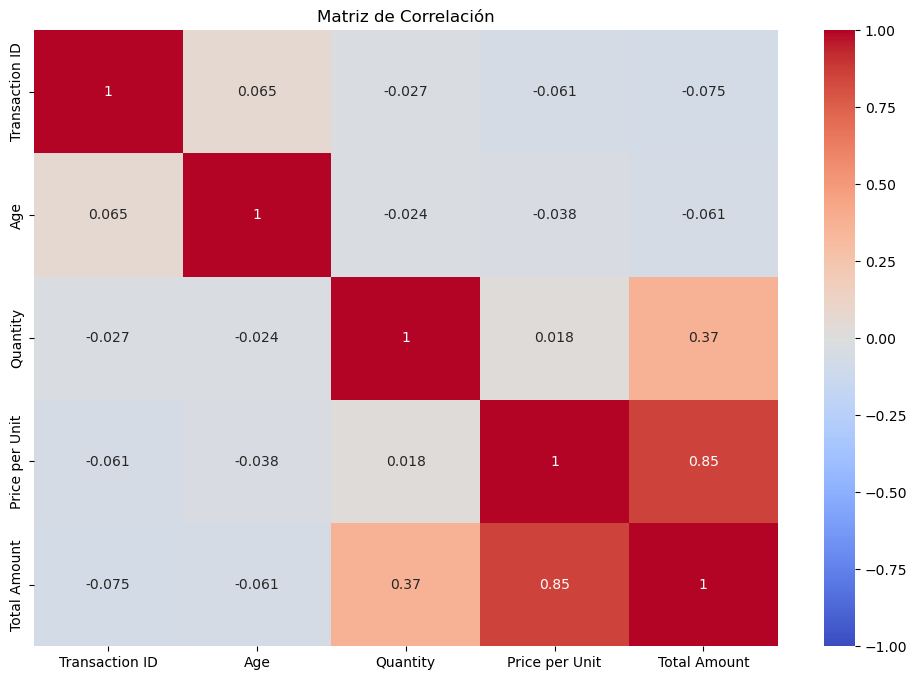

In [10]:
# Seleccionar sólo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación para las columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Las variables con correlaciones más fuertes son Price per Unit y Total Amount, con una correlación de 0.85, lo que indica que el monto total de la compra está muy influenciado por el precio por unidad.
Las otras correlaciones son muy débiles o casi nulas, lo que sugiere que no hay una relación lineal significativa entre esas variables y otras como Age, Transaction ID, y Quantity.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Imprimir la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
                Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


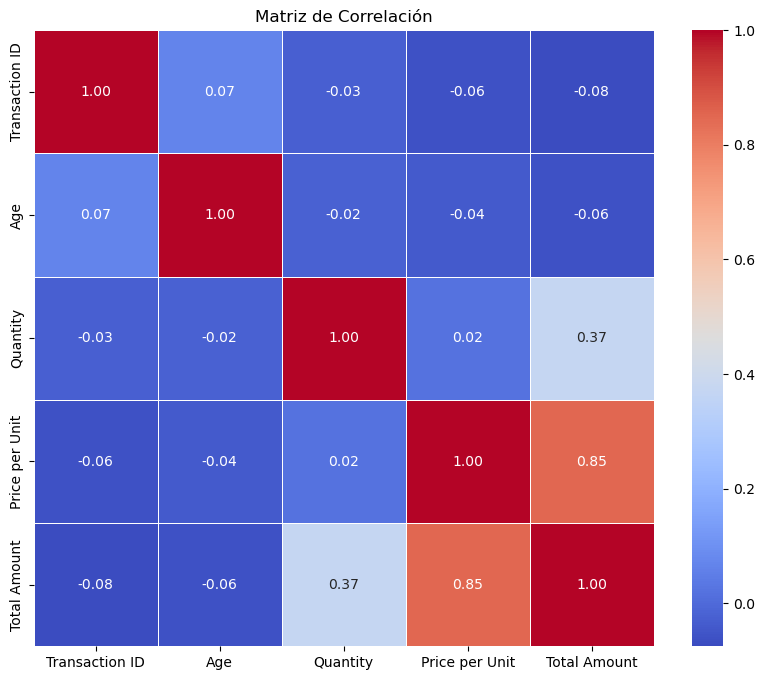

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación solo con columnas numéricas
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()


**Parte 1: Preprocesamiento de Datos**

**Limpieza de Datos:**
* Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
* Manejar los outliers mediante técnicas de filtrado o transformación.


In [14]:
# 1. Identificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [15]:
# Detectar y manejar outliers
# Definir un rango intercuartílico (IQR) para filtrar outliers
for col in ['Age', 'Quantity', 'Price per Unit', 'Total Amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar datos dentro de los límites
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verificar si se eliminaron los outliers
print("Descripción después de manejar outliers:")
print(df.describe())

# Verificar el tamaño del DataFrame después de limpieza
print(f"Tamaño del DataFrame después de limpieza: {df.shape}")

Descripción después de manejar outliers:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
Tamaño del DataFrame después de limpieza: (1000, 9)


In [16]:
# Detectar valores duplicados
duplicados = df[df.duplicated()]
print(f"Valores duplicados encontrados: {len(duplicados)}")

# Mostrar los duplicados (si los hay)
if len(duplicados) > 0:
    print("Filas duplicadas:")
    print(duplicados)

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar si los duplicados fueron eliminados
print(f"Tamaño del DataFrame después de eliminar duplicados: {df.shape}")


Valores duplicados encontrados: 0
Tamaño del DataFrame después de eliminar duplicados: (1000, 9)


In [17]:
#df = df.drop(columns=['Customer ID'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [18]:
# Columnas a convertir a category
categorical_columns = ['Gender', 'Product Category']

# Convertir columnas al tipo category
df[categorical_columns] = df[categorical_columns].astype('category')

# Verificar los cambios
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Date              1000 non-null   object  
 2   Customer ID       1000 non-null   object  
 3   Gender            1000 non-null   category
 4   Age               1000 non-null   int64   
 5   Product Category  1000 non-null   category
 6   Quantity          1000 non-null   int64   
 7   Price per Unit    1000 non-null   int64   
 8   Total Amount      1000 non-null   int64   
dtypes: category(2), int64(5), object(2)
memory usage: 57.0+ KB
None


**Transformación de Columnas:**
* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
* Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.


**Creación de Pipelines:**
* Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.
* Incluir todos los pasos de preprocesamiento en el pipeline.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Convertir las columnas 'Gender' y 'Product Category' a categorías
df['Gender'] = df['Gender'].astype('category')
df['Product Category'] = df['Product Category'].astype('category')

# Definir las variables predictoras (X) y la variable dependiente (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID'])  # Excluimos columnas no relevantes
y = df['Total Amount']  # Usamos 'Total Amount' como variable dependiente para ejemplo

# Definir preprocesador para aplicar One-Hot Encoding y Escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes en columnas numéricas
            ('scaler', StandardScaler())  # Escalado de las variables numéricas
        ]), ['Age', 'Quantity', 'Price per Unit']),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes en columnas categóricas
            ('onehot', OneHotEncoder())  # One-Hot Encoding para columnas categóricas
        ]), ['Gender', 'Product Category'])
    ])

# Crear un pipeline completo con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Puedes cambiar el clasificador según sea necesario
])

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
pipeline.fit(X_train, y_train)

# Evaluación del modelo
print(f'Precisión del modelo: {pipeline.score(X_test, y_test):.4f}')

# Validación cruzada para evaluación del modelo
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'Precisión media en validación cruzada: {cv_scores.mean():.4f}')


Precisión del modelo: 0.9800
Precisión media en validación cruzada: 0.9860


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Date              1000 non-null   object  
 2   Customer ID       1000 non-null   object  
 3   Gender            1000 non-null   category
 4   Age               1000 non-null   int64   
 5   Product Category  1000 non-null   category
 6   Quantity          1000 non-null   int64   
 7   Price per Unit    1000 non-null   int64   
 8   Total Amount      1000 non-null   int64   
dtypes: category(2), int64(5), object(2)
memory usage: 57.0+ KB


**Parte 2: Selección de Técnica de Machine Learning**

**Entrenamiento Inicial:**
* Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Convertir las columnas 'Gender' y 'Product Category' a categorías
df['Gender'] = df['Gender'].astype('category')
df['Product Category'] = df['Product Category'].astype('category')

# Definir las variables predictoras (X) y la variable dependiente (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID'])  # Excluimos columnas no relevantes
y = df['Total Amount']  # Usamos 'Total Amount' como variable dependiente para ejemplo

# Definir preprocesador para aplicar One-Hot Encoding y Escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes en columnas numéricas
            ('scaler', StandardScaler())  # Escalado de las variables numéricas
        ]), ['Age', 'Quantity', 'Price per Unit']),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes en columnas categóricas
            ('onehot', OneHotEncoder())  # One-Hot Encoding para columnas categóricas
        ]), ['Gender', 'Product Category'])
    ])

# Modelos a entrenar
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Evaluación de los modelos
results = {}

for name, model in models.items():
    # Crear el pipeline con el preprocesador y el modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Realizar validación cruzada y guardar los resultados
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # Negar porque sklearn devuelve negativos
    results[name] = np.mean(cv_scores)  # Almacenamos la media de los puntajes negativos

# Imprimir los resultados
for name, score in results.items():
    print(f'{name}: {score:.4f}')

# Seleccionar el mejor modelo
best_model_name = min(results, key=results.get)
print(f'\nEl mejor modelo es: {best_model_name}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 440.456250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Convertir las columnas 'Gender' y 'Product Category' a categorías
df['Gender'] = df['Gender'].astype('category')
df['Product Category'] = df['Product Category'].astype('category')

# Definir las variables predictoras (X) y la variable dependiente (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID'])  # Excluimos columnas no relevantes
y = df['Total Amount']  # Usamos 'Total Amount' como variable dependiente para ejemplo

# Definir preprocesador para aplicar One-Hot Encoding y Escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes en columnas numéricas
            ('scaler', StandardScaler())  # Escalado de las variables numéricas
        ]), ['Age', 'Quantity', 'Price per Unit']),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes en columnas categóricas
            ('onehot', OneHotEncoder())  # One-Hot Encoding para columnas categóricas
        ]), ['Gender', 'Product Category'])
    ])

# Modelos a entrenar
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=5),  # Regularización para el árbol de decisión
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5),  # Regularización para RandomForest
    'XGBoost': XGBRegressor(
        learning_rate=0.1,  # Ajuste de learning rate
        n_estimators=200,  # Ajuste de número de iteraciones
        max_depth=6,  # Ajuste de la profundidad máxima
        min_child_weight=1,  # Regularización para XGBoost
        subsample=0.8  # Usar un subconjunto de los datos para evitar sobreajuste
    ),
    'LightGBM': LGBMRegressor(
        learning_rate=0.05,  # Ajuste de learning rate
        n_estimators=200,  # Ajuste de número de iteraciones
        num_leaves=31,  # Número de hojas (ajuste para LightGBM)
        max_depth=6,  # Ajuste de la profundidad máxima
        min_data_in_leaf=20  # Regularización para LightGBM
    )
}

# Evaluación de los modelos
results = {}

for name, model in models.items():
    # Crear el pipeline con el preprocesador y el modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Realizar validación cruzada y guardar los resultados
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # Negar porque sklearn devuelve negativos
    results[name] = np.mean(cv_scores)  # Almacenamos la media de los puntajes negativos

# Imprimir los resultados
for name, score in results.items():
    print(f'{name}: {score:.4f}')

# Seleccionar el mejor modelo
best_model_name = min(results, key=results.get)
print(f'\nEl mejor modelo es: {best_model_name}')


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 440.456250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

**Comparación de Modelos:**
* Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).
* Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict

# Evaluación de modelos con múltiples métricas
results = {}

for name, model in models.items():
    # Crear el pipeline con el preprocesador y el modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Realizar predicciones con validación cruzada
    predicted = cross_val_predict(pipeline, X, y, cv=5)
    
    # Calcular las métricas de rendimiento
    mse = mean_squared_error(y, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predicted)
    r2 = r2_score(y, predicted)
    
    # Almacenar los resultados
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Imprimir los resultados
for name, metrics in results.items():
    print(f'\nModelo: {name}')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')

# Seleccionar el mejor modelo según el MSE más bajo
best_model_name = min(results, key=lambda x: results[x]['MSE'])
print(f'\nEl mejor modelo según MSE es: {best_model_name}')


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 440.456250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [29]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Definir el modelo
lgbm = LGBMRegressor()

# Definir el espacio de búsqueda de los hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Rango de tasas de aprendizaje
    'n_estimators': [100, 200, 300],  # Número de estimadores
    'num_leaves': [31, 50, 100],  # Número de hojas
    'max_depth': [-1, 5, 10],  # Profundidad máxima de los árboles
    'min_data_in_leaf': [20, 30, 40]  # Mínimo de muestras por hoja
}

# Crear un pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgbm)
])

# Implementar GridSearchCV para la optimización de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Realizar la búsqueda de los mejores parámetros
grid_search.fit(X, y)

# Imprimir los mejores parámetros encontrados
print(f'Best parameters found: {grid_search.best_params_}')

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Calcular las métricas para el modelo optimizado
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir las métricas de evaluación
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


ValueError: Invalid parameter 'learning_rate' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product Category'])])),
                ('model', LGBMRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].